### Problem Statement
#### Goal is to develop and train a DNN to learn the chances that a customer will be a potential high-value customer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/act_train.csv")
people = pd.read_csv("data/people.csv")
print("Shape of df:", df.shape)
print("Shape of People df:", people.shape)

Shape of df: (2197291, 15)
Shape of People df: (189118, 41)


In [3]:
df.head(5)

people_id   activity_id        date activity_category char_1 char_2 char_3  \
0   ppl_100  act2_1734928  2023-08-26            type 4    NaN    NaN    NaN   
1   ppl_100  act2_2434093  2022-09-27            type 2    NaN    NaN    NaN   
2   ppl_100  act2_3404049  2022-09-27            type 2    NaN    NaN    NaN   
3   ppl_100  act2_3651215  2023-08-04            type 2    NaN    NaN    NaN   
4   ppl_100  act2_4109017  2023-08-26            type 2    NaN    NaN    NaN   

  char_4 char_5 char_6 char_7 char_8 char_9  char_10  outcome  
0    NaN    NaN    NaN    NaN    NaN    NaN  type 76        0  
1    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
2    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
3    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0  
4    NaN    NaN    NaN    NaN    NaN    NaN   type 1        0

In [4]:
people.head()

people_id  char_1      group_1  char_2        date   char_3   char_4  \
0     ppl_100  type 2  group 17304  type 2  2021-06-29   type 5   type 5   
1  ppl_100002  type 2   group 8688  type 3  2021-01-06  type 28   type 9   
2  ppl_100003  type 2  group 33592  type 3  2022-06-10   type 4   type 8   
3  ppl_100004  type 2  group 22593  type 3  2022-07-20  type 40  type 25   
4  ppl_100006  type 2   group 6534  type 3  2022-07-27  type 40  type 25   

   char_5  char_6   char_7   ...    char_29 char_30  char_31  char_32  \
0  type 5  type 3  type 11   ...      False    True     True    False   
1  type 5  type 3  type 11   ...      False    True     True     True   
2  type 5  type 2   type 5   ...      False   False     True     True   
3  type 9  type 4  type 16   ...       True    True     True     True   
4  type 9  type 3   type 8   ...      False   False     True    False   

   char_33  char_34  char_35  char_36  char_37  char_38  
0    False     True     True     True    False       36  
1     True     True     True     True    False       76  
2     True     True    False     True     True       99  
3     True     True     True     True     True       76  
4    False    False     True     True    False       84  

[5 rows x 41 columns]

### Check for Nulls

Activity data.

In [5]:
df.isnull().sum()/df.shape[0]*100

people_id             0.000000
activity_id           0.000000
date                  0.000000
activity_category     0.000000
char_1               92.826849
char_2               92.826849
char_3               92.826849
char_4               92.826849
char_5               92.826849
char_6               92.826849
char_7               92.826849
char_8               92.826849
char_9               92.826849
char_10               7.173151
outcome               0.000000
dtype: float64

People data

In [6]:
people.isnull().sum().sum()

0

### Drop columns with 90% missing values

In [7]:
#Create the list of columns to drop from activity data
columns_to_remove = ["char_" + str(x) for x in np.arange(1,10)]
print("Columns to remove:", columns_to_remove)
df = df[list(set(df.columns) - set(columns_to_remove))]

Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']


Rename 2 columns with same name 

In [8]:
df = df.rename(columns={"date":"activity_date","char_10":"activity_type"})

Replace nulls in `activity_type`.

In [9]:
df["activity_type"] = df["activity_type"].fillna(df["activity_type"].mode()[0])

In [10]:
df.shape

(2197291, 6)

DataFrame with Activity data looks like this now:

In [11]:
df.dtypes

activity_type        object
outcome               int64
people_id            object
activity_date        object
activity_id          object
activity_category    object
dtype: object

### Join the datasets
Using `people_id`

In [12]:
df_new = df.merge(people, on=["people_id"], how="inner")
df_new.shape

(2197291, 46)

### Studying target `outcome`
This is the value we predict

In [13]:
print("Unique values:", df_new["outcome"].unique())

Unique values: [0 1]


In [14]:
print("Distribution of outcome values:\n",df_new["outcome"].value_counts()/df_new.shape[0])

Distribution of outcome values:
 0    0.556046
1    0.443954
Name: outcome, dtype: float64


`0` means not potential customer, `1` means potential customer.

Separate the target values - column `outcome` - from the input dataset

In [15]:
outcome = np.array(df_new["outcome"]).reshape(-1,1)
del(df_new["outcome"])

## Data Engineering

#### Check datatypes

In [16]:
print("Distinct DataTypes:", list(df_new.dtypes.unique()))

Distinct DataTypes: [dtype('O'), dtype('bool'), dtype('int64')]


### Convert Boolean to int

In [17]:
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]
boolean_columns = temp.index[temp["DataType"] == "bool"].values
print("Boolean columns - \n", boolean_columns)

#conversion
for column in boolean_columns:
    df_new[column] = np.where(df_new[column] == True, 1, 0)

print("\nDistinct DataTypes after processing:", df_new.dtypes.unique())

Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']

Distinct DataTypes after processing: [dtype('O') dtype('int32') dtype('int64')]


### Categorical Features

In [18]:
categorical_columns = temp.index[temp["DataType"] == "O"].values

In [19]:
for column in categorical_columns:
    print(column + " column has:", str(len(df_new[column].unique())) + " distinct values")

activity_type column has: 6515 distinct values
people_id column has: 151295 distinct values
activity_date column has: 411 distinct values
activity_id column has: 2197291 distinct values
activity_category column has: 7 distinct values
char_1 column has: 2 distinct values
group_1 column has: 29899 distinct values
char_2 column has: 3 distinct values
date column has: 1196 distinct values
char_3 column has: 43 distinct values
char_4 column has: 25 distinct values
char_5 column has: 9 distinct values
char_6 column has: 7 distinct values
char_7 column has: 25 distinct values
char_8 column has: 8 distinct values
char_9 column has: 9 distinct values


There are 5 columns with many distinct values.

Check categorical columns for better understanding.

In [20]:
many_distinct_values = ["people_id", "activity_type", "activity_id", "group_1"]
df_new[many_distinct_values].head(5)

people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304

Convert date columns.

Column `date`

In [21]:
df_new["date"] = pd.to_datetime(df_new["date"])

df_new["Year"] = df_new["date"].dt.year
df_new["Month"] = df_new["date"].dt.month
df_new["Quarter"] = df_new["date"].dt.quarter
df_new["Week"] = df_new["date"].dt.week
df_new["WeekDay"] = df_new["date"].dt.weekday
df_new["Day"] = df_new["date"].dt.day

Column `activity_date`

In [22]:
df_new["activity_date"] = pd.to_datetime(df_new["activity_date"])

df_new["activity_date"] = pd.to_datetime(df_new["activity_date"])
df_new["Activity_Year"] = df_new["activity_date"].dt.year
df_new["Activity_Month"] = df_new["activity_date"].dt.month
df_new["Activity_Quarter"] = df_new["activity_date"].dt.quarter
df_new["Activity_Week"] = df_new["activity_date"].dt.week
df_new["Activity_WeekDay"] = df_new["activity_date"].dt.weekday
df_new["Activity_Day"] = df_new["activity_date"].dt.day

Remove both date columns

In [23]:
remove_cols = ["activity_date", "date"]

for r_cols in remove_cols:
    del(df_new[r_cols])
    ix = np.where(categorical_columns == r_cols)[0][0]
    #print(r_cols, ix)
    categorical_columns = np.delete(categorical_columns, ix)

Columns `activity_date` and `date` are taken care of. Check the remaining categorical columns that need attention

In [24]:
#df_new.head()
for column in categorical_columns:
    print(column + " column has:", str(len(df_new[column].unique())) + " distinct values")

activity_type column has: 6515 distinct values
people_id column has: 151295 distinct values
activity_id column has: 2197291 distinct values
activity_category column has: 7 distinct values
char_1 column has: 2 distinct values
group_1 column has: 29899 distinct values
char_2 column has: 3 distinct values
char_3 column has: 43 distinct values
char_4 column has: 25 distinct values
char_5 column has: 9 distinct values
char_6 column has: 7 distinct values
char_7 column has: 25 distinct values
char_8 column has: 8 distinct values
char_9 column has: 9 distinct values


Sanity check

In [25]:
print("Shape of data after create Date Features:", df_new.shape)

Shape of data after create Date Features: (2197291, 55)


Some of remaining categorical columns, which have very high numbers of distinct values.

In [26]:
df_new[many_distinct_values].head()

people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304

We can extract number from the string in above columns

In [27]:
import re

print("Before:", df_new.shape)
for column in many_distinct_values:
    print("Extracting digit for column:", column)
    df_new[column] = df_new[column].apply(lambda x: np.int64(re.findall('\d+', x )[0]))

print("After:", df_new.shape)

Before: (2197291, 55)
Extracting digit for column: people_id
Extracting digit for column: activity_type
Extracting digit for column: activity_id
Extracting digit for column: group_1
After: (2197291, 55)


In [28]:
df_new[["people_id", "activity_type", "activity_id", "group_1"]].head()

people_id  activity_type  activity_id  group_1
0        100             76            2    17304
1        100              1            2    17304
2        100              1            2    17304
3        100              1            2    17304
4        100              1            2    17304

Remove the columns we are done manipulating from `categorical_columns`.

In [29]:
mask = np.isin(categorical_columns, many_distinct_values, invert=True)
categorical_columns = categorical_columns[mask]

Do a sanity check to see the categorical columns we have left to manipulate

In [30]:
count_all = 0
for column in categorical_columns:
    count = len(df_new[column].unique())
    print(column + " column has:", str(count) + " distinct values")
    count_all +=count
    
print(count_all)

activity_category column has: 7 distinct values
char_1 column has: 2 distinct values
char_2 column has: 3 distinct values
char_3 column has: 43 distinct values
char_4 column has: 25 distinct values
char_5 column has: 9 distinct values
char_6 column has: 7 distinct values
char_7 column has: 25 distinct values
char_8 column has: 8 distinct values
char_9 column has: 9 distinct values
138


### Convert columns with low number of distinct values with One Hot Encoder
The column is then removed from the main DataFrame, once it is encoded.

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a), columns = column_names))

In [32]:
for column in categorical_columns:
    print("Running One Hot Decoder on column:", column)
    temp_df = create_ohe(df_new, column)
    df_new = pd.concat([df_new, temp_df], axis=1)
    del(df_new[column])

Running One Hot Decoder on column: activity_category
Running One Hot Decoder on column: char_1
Running One Hot Decoder on column: char_2
Running One Hot Decoder on column: char_3
Running One Hot Decoder on column: char_4
Running One Hot Decoder on column: char_5
Running One Hot Decoder on column: char_6
Running One Hot Decoder on column: char_7
Running One Hot Decoder on column: char_8
Running One Hot Decoder on column: char_9


In [33]:
print("Shape of input dataset:", df_new.shape)
print("Shape of target:", outcome.shape)

Shape of input dataset: (2197291, 183)
Shape of target: (2197291, 1)


### Split the dataset

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(df_new, outcome, test_size=0.2,random_state=2018)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1,random_state=2018)

In [36]:
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of x_val:", x_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of x_train: (1582048, 183)
Shape of x_test: (439459, 183)
Shape of x_val: (175784, 183)
Shape of y_train: (1582048, 1)
Shape of y_test: (439459, 1)
Shape of y_val: (175784, 1)


### Baseline accuracy
We compare the result to what would have happened if we never had a model.

**Largest class is the prediction for all customers** - value `0` is the largest class with `55,6%`. The goal of the model is to beat the 0.556 mark.

### Designing the DNN for Classification

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [38]:
model = Sequential()
model.add(Dense(256, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [39]:
model.compile(optimizer="Adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"])

In [40]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 82s 52us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 2/3
1582048/1582048 [==============================] - 78s 49us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455
Epoch 3/3
1582048/1582048 [==============================] - 78s 49us/step - loss: 8.8669 - acc: 0.4438 - val_loss: 8.8394 - val_acc: 0.4455


The results are not better than the baseline accuracy. Deeper or bigger NN will not help.

### Revisit the data
Improve training data by standardizing it. `Standardscaler` or `Minmaxscaler` can be useful.

In **standardization**, the data is **transformed to mean=0** and **standard deviation=1**.

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [44]:
model = Sequential()
model.add(Dense(512, input_dim=x_train_scaled.shape[1], activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [45]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 75s 47us/step - loss: 0.2312 - acc: 0.8991 - val_loss: 0.1895 - val_acc: 0.9220
Epoch 2/3
1582048/1582048 [==============================] - 71s 45us/step - loss: 0.1718 - acc: 0.9315 - val_loss: 0.1576 - val_acc: 0.9383
Epoch 3/3
1582048/1582048 [==============================] - 71s 45us/step - loss: 0.1463 - acc: 0.9440 - val_loss: 0.1459 - val_acc: 0.9442


Evaluate the model performance

In [47]:
result = model.evaluate(x_test_scaled, y_test)
for i in range(len(model.metrics_names)):
    print("Metric", model.metrics_names[i] ,":", str(round(result[i],2)))

439459/439459 [==============================] - 9s 20us/step
Metric loss : 0.15
Metric acc : 0.94


Add a hidden layer

In [48]:
model = Sequential()
model.add(Dense(512, input_dim=x_train_scaled.shape[1], activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 240s 152us/step - loss: 0.1954 - acc: 0.9143 - val_loss: 0.1407 - val_acc: 0.9413
Epoch 2/3
1582048/1582048 [==============================] - 240s 152us/step - loss: 0.1179 - acc: 0.9528 - val_loss: 0.1048 - val_acc: 0.9588
Epoch 3/3
1582048/1582048 [==============================] - 269s 170us/step - loss: 0.0916 - acc: 0.9645 - val_loss: 0.0899 - val_acc: 0.9662


Attempt with a bigger network

In [49]:
model = Sequential()
model.add(Dense(1024, input_dim=x_train_scaled.shape[1], activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=3, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/3
1582048/1582048 [==============================] - 770s 487us/step - loss: 0.1967 - acc: 0.9127 - val_loss: 0.1431 - val_acc: 0.9397
Epoch 2/3
1582048/1582048 [==============================] - 769s 486us/step - loss: 0.1172 - acc: 0.9522 - val_loss: 0.1023 - val_acc: 0.9596
Epoch 3/3
1582048/1582048 [==============================] - 769s 486us/step - loss: 0.0906 - acc: 0.9644 - val_loss: 0.0933 - val_acc: 0.9653


Final training set

In [50]:
model = Sequential()
model.add(Dense(512, input_dim=x_train_scaled.shape[1], activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=15, batch_size=64)

Train on 1582048 samples, validate on 175784 samples
Epoch 1/15
1582048/1582048 [==============================] - 244s 154us/step - loss: 0.1958 - acc: 0.9138 - val_loss: 0.1405 - val_acc: 0.9427
Epoch 2/15
1582048/1582048 [==============================] - 245s 155us/step - loss: 0.1190 - acc: 0.9521 - val_loss: 0.1105 - val_acc: 0.9566
Epoch 3/15
1582048/1582048 [==============================] - 242s 153us/step - loss: 0.0927 - acc: 0.9637 - val_loss: 0.0900 - val_acc: 0.9652
Epoch 4/15
1582048/1582048 [==============================] - 244s 154us/step - loss: 0.0781 - acc: 0.9701 - val_loss: 0.0804 - val_acc: 0.9708
Epoch 5/15
1582048/1582048 [==============================] - 244s 154us/step - loss: 0.0692 - acc: 0.9741 - val_loss: 0.0752 - val_acc: 0.9725
Epoch 6/15
1582048/1582048 [==============================] - 243s 154us/step - loss: 0.0621 - acc: 0.9771 - val_loss: 0.0691 - val_acc: 0.9747
Epoch 7/15
1582048/1582048 [==============================] - 242s 153us/step - los

Validate the model performance with test data

In [51]:
result = model.evaluate(x_test_scaled, y_test)

for i in range(len(model.metrics_names)):
    print("Metric ", model.metrics_names[i], ":", str(round(result[i],2)))

439459/439459 [==============================] - 27s 60us/step
Metric  loss : 0.06
Metric  acc : 0.98


### Plotting *loss* curve for training and validation dataset

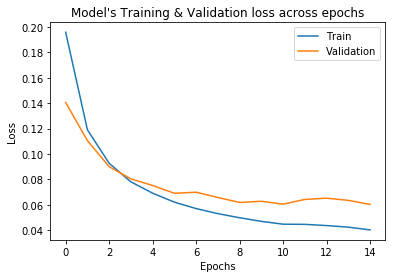

In [52]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Plotting *accuracy* curve for training and validation dataset

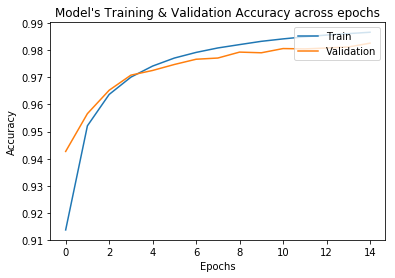

In [53]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()